In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import seaborn as sns

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drinking_df = pd.read_csv("heavy episodic drinking.csv")
depression_df = pd.read_csv("Population based prevalence of depression.csv")
obesity_df = pd.read_csv("Prevalence of Obesity Among adults BMI over 30 estimates by country.csv")
overweight_df = pd.read_csv("Prevalence of Overweights among adults BMI over 25.csv")


In [14]:
drinking_df.tail()

,Unnamed: 0,Unnamed: 1,"Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized with 95%CI","Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized with 95%CI.1","Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized with 95%CI.2"
190,Venezuela (Bolivarian Republic of),2016,14.9 [13.1-16.8],25.4 [22.5-28.2],4.7 [3.8-5.6]
191,Viet Nam,2016,14.4 [13.1-15.8],24.6 [22.5-26.7],4.4 [3.8-5.1]
192,Yemen,2016,0 [0-0],0 [0-0],0 [0-0]
193,Zambia,2016,12.6 [11.6-13.6],21.6 [20-23],3.8 [3.3-4.3]
194,Zimbabwe,2016,8.3 [7.5-9.2],14.6 [13.2-16],2.3 [2-2.8]


In [62]:
depression_df.shape

(184, 2)

In [15]:
obesity_df['Unnamed: 0'].count()

196

In [25]:
overweight_df.info()
overweight_df.head()
overweight_filtered = overweight_df[['Unnamed: 0',"2015","2015.1","2015.2"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Columns: 127 entries, Unnamed: 0 to 1975.2
dtypes: object(127)
memory usage: 196.6+ KB


In [21]:
obesity_df.head()


In [45]:
# rename columns
obesity_filtered = obesity_df[['Unnamed: 0',"2015","2015.1","2015.2"]]
obesity_columnNames = ['Country','BMI>=30_both_sexes', "BMI>=30_male", "BMI>=30_female"]

In [49]:
obesity_filtered.columns = obesity_columnNames
obesity_checkpoint1 = obesity_filtered

In [50]:
# drop first 3 rows
obesity_filtered.drop([0,1,2],inplace=True)


C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
obesity_filtered = obesity_filtered.reset_index()
obesity_filtered.drop(['index'],axis=1)

,Country,BMI>=30_both_sexes,BMI>=30_male,BMI>=30_female
0,Afghanistan,5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8]
1,Albania,21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1]
2,Algeria,26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7]
3,Andorra,25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4]
4,Angola,7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2]
...,...,...,...,...
190,Venezuela (Bolivarian Republic of),25.2 [21.0-29.5],22.0 [16.2-28.2],28.3 [22.4-34.6]
191,Viet Nam,2.0 [1.3-2.9],1.5 [0.8-2.5],2.4 [1.4-3.9]
192,Yemen,16.5 [12.9-20.5],11.4 [7.0-16.7],21.3 [15.6-27.4]
193,Zambia,7.7 [5.6-10.2],3.4 [1.6-6.1],12.0 [8.2-16.4]


In [54]:
BMI_both_sexes = []
for a in obesity_filtered['BMI>=30_both_sexes']:
    BMI_both_sexes.append(a.split(" ")[0])
    

In [131]:
BMI_both_sexes = [a.split(" ")[0] for a in obesity_filtered['BMI>=30_both_sexes']]
BMI_male = [b.split(" ")[0] for b in obesity_filtered['BMI>=30_male']]
BMI_female = [c.split(" ")[0] for c in obesity_filtered['BMI>=30_female']]

In [132]:
obesity_cleaned = pd.DataFrame({"Country":obesity_filtered['Country'],
                               "BMI>=30_both_sexes": BMI_both_sexes,
                               "BMI>=30_male":BMI_male,
                               "BMI>=30_female": BMI_female})
# delete rows with no data
obesity_cleaned = obesity_cleaned[~obesity_cleaned['BMI>=30_both_sexes'].isin(['No'])]
# change data type from object to float
obesity_cleaned['BMI>=30_both_sexes'] = obesity_cleaned['BMI>=30_both_sexes'].astype("float")
obesity_cleaned['BMI>=30_male'] = obesity_cleaned['BMI>=30_male'].astype("float")
obesity_cleaned['BMI>=30_female'] = obesity_cleaned['BMI>=30_female'].astype("float")

# obesity_cleaned

In [133]:
obesity_cleaned.dtypes
obesity_cleaned.head()

,Country,BMI>=30_both_sexes,BMI>=30_male,BMI>=30_female
0,Afghanistan,5.2,3.0,7.3
1,Albania,21.1,20.9,21.3
2,Algeria,26.7,19.2,34.2
3,Andorra,25.4,25.5,25.2
4,Angola,7.9,3.8,11.6


In [60]:
depression_df.head()

,Unnamed: 0,Estimated population-based prevalence of depression
0,Country,2015.0
1,Afghanistan,3.3
2,Albania,4.8
3,Algeria,4.5
4,Angola,3.6


In [63]:
depression_columnNames = ['Country','Estimated_depression']
depression_df.columns = depression_columnNames

In [66]:
depression_df.drop([0],axis=0,inplace=True)

In [75]:
depression_df = depression_df.reset_index()


In [76]:
depression_df.drop(['index'],axis=1, inplace=True)

# depression_df cleaned

In [134]:
depression_obesity = pd.concat([depression_df, obesity_cleaned])

In [135]:
obesity_countryGroup = depression_obesity.groupby(['Country'])

In [136]:
# drop rows that the depression_df doesn't have thats in obesity_depression
not_in_depression = list(obesity_countryGroup.sum().loc[obesity_countryGroup.sum()['Estimated_depression'] == 0,:].index)
obesity_depression_df = obesity_countryGroup.sum().drop(not_in_depression,axis=0)

In [139]:
# Check if the rows are dropped
obesity_depression_df.shape
# reset index
obesity_depression_df = obesity_depression_df.reset_index()
obesity_depression_df.drop(['index'],axis=1,inplace=True)

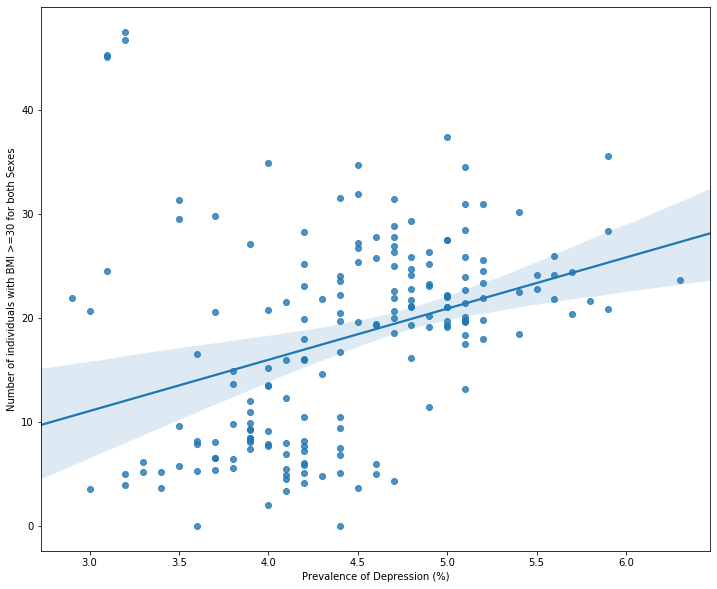

In [140]:
width=12
height = 10
plt.figure(figsize = (width,height))
sns.regplot(x='Estimated_depression', y='BMI>=30_both_sexes', data=obesity_depression_df)
plt.xlabel('Prevalence of Depression (%)')
plt.ylabel("Number of individuals with BMI >=30 for both Sexes")
plt.show()

In [141]:
# Check for correlations
obesity_depression_df[['Estimated_depression', 'BMI>=30_both_sexes']].corr()

,Estimated_depression,BMI>=30_both_sexes
Estimated_depression,1.000000,0.341562
BMI>=30_both_sexes,0.341562,1.000000


Depression doesn't seem to be a good predictor of the obesity levels because the regression line is not steep. The data points are also very scattered and far from the fitted line thus showing a fair amount of variability

We further examine the correlation between Depression and obese individuals and found the correlation to be approximately 0.342

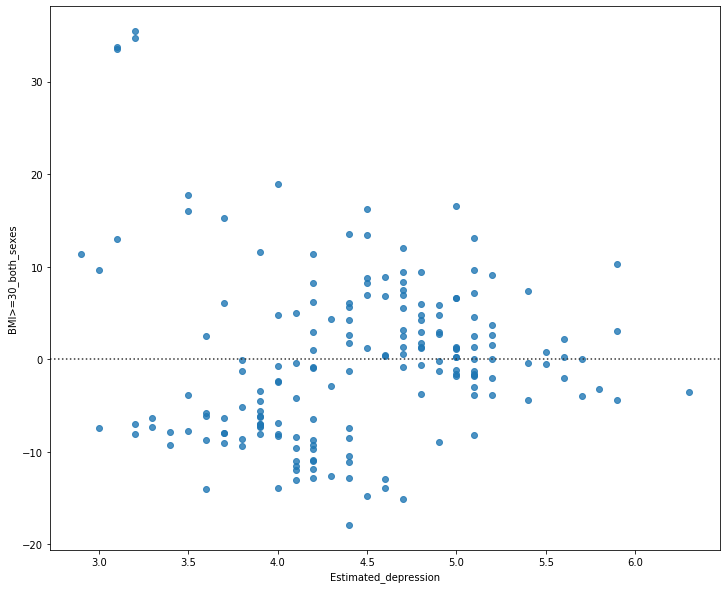

In [129]:
# Residual plot
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x='Estimated_depression', y='BMI>=30_both_sexes',data=obesity_depression_df)
plt.show()

In [142]:
obesity_depression_df.corr()

,level_0,Estimated_depression,BMI>=30_both_sexes,BMI>=30_male,BMI>=30_female
level_0,1.000000,-0.118620,0.039015,0.030657,0.046815
Estimated_depression,-0.118620,1.000000,0.341562,0.413704,0.251573
BMI>=30_both_sexes,0.039015,0.341562,1.000000,0.951617,0.964023
BMI>=30_male,0.030657,0.413704,0.951617,1.000000,0.838571
BMI>=30_female,0.046815,0.251573,0.964023,0.838571,1.000000


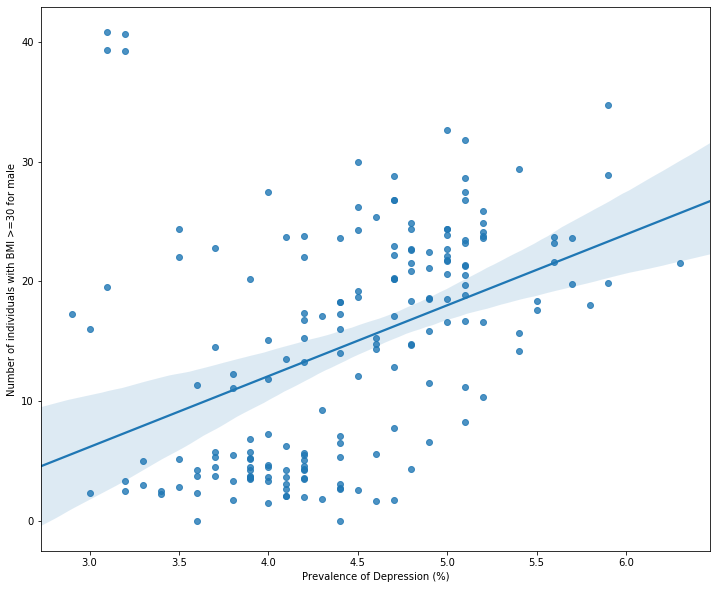

In [145]:
width=12
height = 10
plt.figure(figsize = (width,height))
sns.regplot(x='Estimated_depression', y='BMI>=30_male', data=obesity_depression_df)
plt.xlabel('Prevalence of Depression (%)')
plt.ylabel("Number of individuals with BMI >=30 for male")
plt.show()

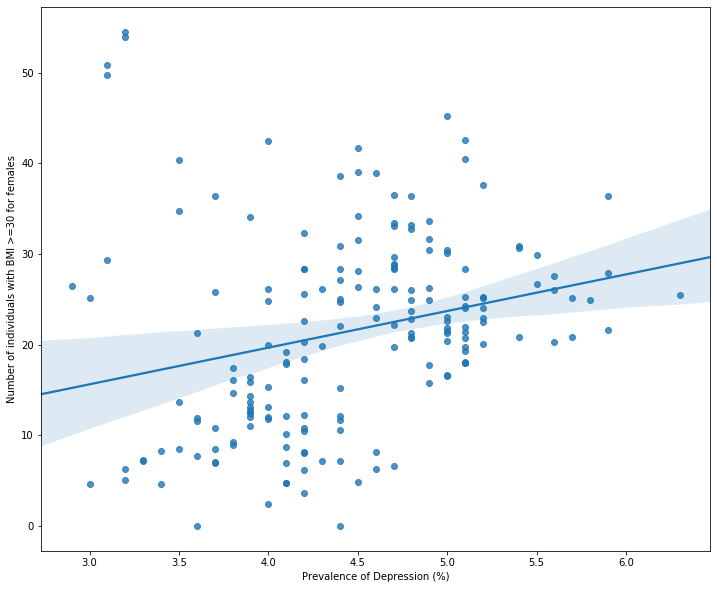

In [146]:
width=12
height = 10
plt.figure(figsize = (width,height))
sns.regplot(x='Estimated_depression', y='BMI>=30_female', data=obesity_depression_df)
plt.xlabel('Prevalence of Depression (%)')
plt.ylabel("Number of individuals with BMI >=30 for females")
plt.show()

In [147]:
obesity_depression_df.head()

,level_0,Country,Estimated_depression,BMI>=30_both_sexes,BMI>=30_male,BMI>=30_female
0,0,Afghanistan,3.3,5.2,3.0,7.3
1,1,Albania,4.8,21.1,20.9,21.3
2,2,Algeria,4.5,26.7,19.2,34.2
3,3,Angola,3.6,7.9,3.8,11.6
4,4,Antigua and Barbuda,5.1,18.4,11.2,25.3


In [148]:
from scipy import stats

In [153]:
pearson_coef,p_value = stats.pearsonr(obesity_depression_df['Estimated_depression'],obesity_depression_df['BMI>=30_both_sexes'])

print(f"The p value is {p_value} and the pearson coefficient is {round(pearson_coef,3)}")

The p value is 2.223221241333972e-06 and the pearson coefficient is 0.342


The p value is less than 0.001 which means the correlation between depression percentage and the obese percentage is statistically significant but the linear relationship is moderaly weak at approximately 0.342

## Create bins for depression %